In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics as sm

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None

In [3]:
# load data and add data about true/fake news. also make column ready for data insertion later
truenews = pd.read_csv("True.csv")
truenews['true'] = 1
fakenews = pd.read_csv("Fake.csv")
fakenews['true'] = 0
news = truenews.append(fakenews,ignore_index=True)
news["occuringText"] = np.empty
news["occuringTitle"] = np.empty
news.head(10)


,title,text,subject,date,true,occuringText,occuringTitle
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,<built-in function empty>,<built-in function empty>
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,<built-in function empty>,<built-in function empty>
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,<built-in function empty>,<built-in function empty>
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,<built-in function empty>,<built-in function empty>
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1,<built-in function empty>,<built-in function empty>


In [4]:
subjectNews= news.groupby('subject').mean()
subjectNews

,true
subject,
Government News,0
Middle-east,0
News,0
US_News,0
left-news,0
politics,0
politicsNews,1
worldnews,1


<AxesSubplot:xlabel='subject'>

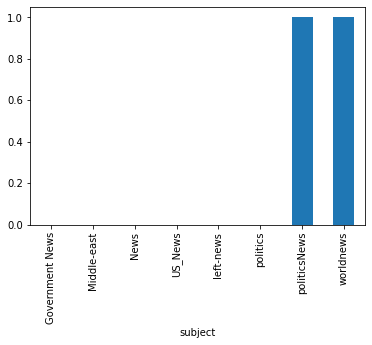

In [5]:
# which subject is true news mostly
subjectNews['true'].plot.bar()

In [6]:
# update data with most occurring words in text
for ind in news.index:
    # Python program to find the k most frequent words
    # from data set
    from collections import Counter
  
    # split() returns list of all the words in the string
    split_it = news["text"][ind].split()
  
    # Pass the split_it list to instance of Counter class.
    Counter = Counter(split_it)
  
    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = Counter.most_common(50)
    news['occuringText'][ind] = most_occur

In [7]:
# update data with most occurring words in title
for ind in news.index:
    # Python program to find the k most frequent words
    # from data set
    from collections import Counter
  
    # split() returns list of all the words in the string
    split_it = news["title"][ind].split()
  
    # Pass the split_it list to instance of Counter class.
    Counter = Counter(split_it)
  
    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = Counter.most_common(50)
    news['occuringTitle'][ind] = most_occur

In [8]:
# calculate total
dictionaryTrue = {}
dictionaryFalse = {}

for ind in news.index:
    wordCountList = news['occuringText'][ind]
    isTrue = news['true'][ind]
    for counterObject in wordCountList:
        word = counterObject[0]
        counter = counterObject[1]
        if isTrue == 1:         
            if word in dictionaryTrue:
                oldValue = dictionaryTrue[word]
                dictionaryTrue[word] = counter + oldValue
            else:
                dictionaryTrue[word] = counter
        else:
                        
            if word in dictionaryFalse:
                oldValue = dictionaryFalse[word]
                dictionaryFalse[word] = counter + oldValue
            else:
                dictionaryFalse[word] = counter
                


In [9]:
# calculate total
dictionaryTrueTitle = {}
dictionaryFalseTitle = {}

for ind in news.index:
    wordCountList = news['occuringTitle'][ind]
    isTrue = news['true'][ind]
    for counterObject in wordCountList:
        word = counterObject[0]
        counter = counterObject[1]
        if isTrue == 1:         
            if word in dictionaryTrueTitle:
                oldValue = dictionaryTrueTitle[word]
                dictionaryTrueTitle[word] = counter + oldValue
            else:
                dictionaryTrueTitle[word] = counter
        else:
                        
            if word in dictionaryFalseTitle:
                oldValue = dictionaryFalseTitle[word]
                dictionaryFalseTitle[word] = counter + oldValue
            else:
                dictionaryFalseTitle[word] = counter
                


In [10]:
# calculate mean for text
for key in dictionaryTrue:
    count = dictionaryTrue[key]
    mean = count / len(truenews) + 1
    dictionaryTrue[key] = mean

for key in dictionaryFalse:
    count = dictionaryFalse[key]
    mean = count / len(fakenews) + 1
    dictionaryFalse[key] = mean

In [11]:
# calculate mean for title
for key in dictionaryTrueTitle:
    count = dictionaryTrueTitle[key]
    mean = count / len(truenews) + 1
    dictionaryTrueTitle[key] = mean

for key in dictionaryFalseTitle:
    count = dictionaryFalseTitle[key]
    mean = count / len(fakenews) + 1
    dictionaryFalseTitle[key] = mean

In [12]:
# sort dictionaries
sortedTrue = sorted(dictionaryTrue.items(), key=lambda x: x[1],reverse=True)[:100]
sortedFalse = sorted(dictionaryFalse.items(), key=lambda x: x[1],reverse=True)[:100]

sortedTrueKeys = []
sortedTrueValues = []
for x in sortedTrue:
    sortedTrueKeys.append(x[0])
    sortedTrueValues.append(x[1])
    
sortedFalseKeys = []
sortedFalseValues = []
for k in sortedFalse:
    sortedFalseKeys.append(k[0])
    sortedFalseValues.append(k[1])
    

In [13]:
# sort dictionaries
sortedTrueTitle = sorted(dictionaryTrueTitle.items(), key=lambda x: x[1],reverse=True)[:100]
sortedFalseTitle = sorted(dictionaryFalseTitle.items(), key=lambda x: x[1],reverse=True)[:100]

sortedTrueKeysTitle = []
sortedTrueValuesTitle = []
for x in sortedTrueTitle:
    sortedTrueKeysTitle.append(x[0])
    sortedTrueValuesTitle.append(x[1])
    
sortedFalseKeysTitle = []
sortedFalseValuesTitle = []
for k in sortedFalseTitle:
    sortedFalseKeysTitle.append(k[0])
    sortedFalseValuesTitle.append(k[1])
    

In [19]:
# amount to show in plot
start = 0
amountToShow = 30


<Figure size 432x288 with 0 Axes>

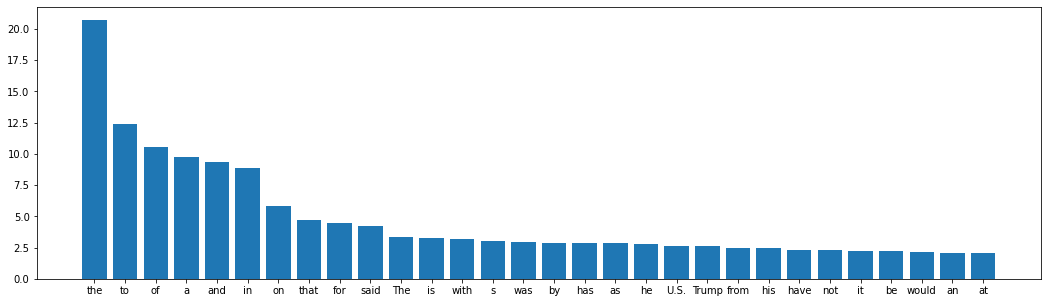

<Figure size 432x288 with 0 Axes>

In [20]:
# true news text
plt.figure()
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(sortedTrueKeys[start:amountToShow], sortedTrueValues[start:amountToShow])
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

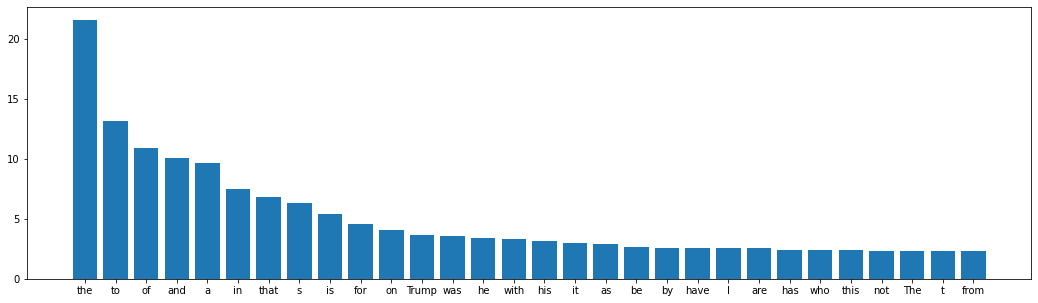

<Figure size 432x288 with 0 Axes>

In [21]:
#fake news text
plt.figure()
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(sortedFalseKeys[start:amountToShow], sortedFalseValues[start:amountToShow])
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

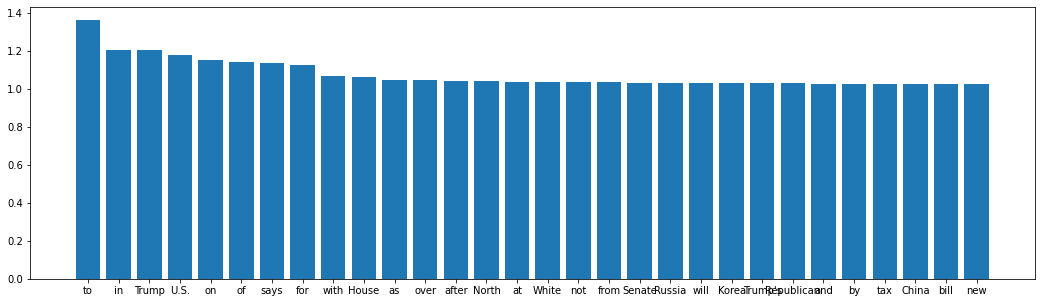

<Figure size 432x288 with 0 Axes>

In [22]:
## true news title

plt.figure()
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(sortedTrueKeysTitle[start:amountToShow], sortedTrueValuesTitle[start:amountToShow])
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

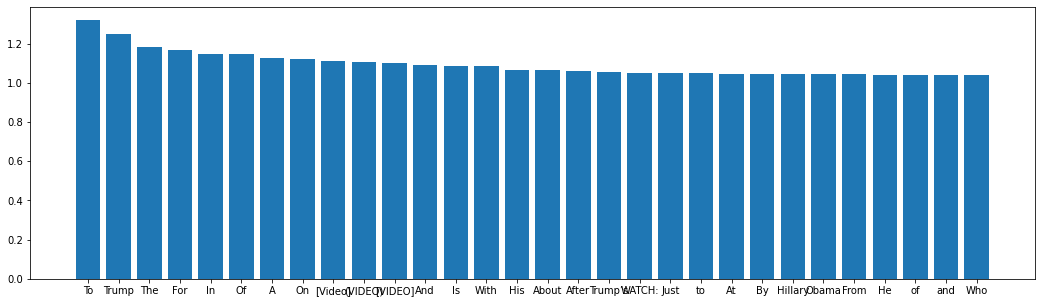

<Figure size 432x288 with 0 Axes>

In [23]:
## fake news title
plt.figure()
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar(sortedFalseKeysTitle[start:amountToShow], sortedFalseValuesTitle[start:amountToShow])
plt.show()
plt.clf()

In [40]:
## collect all words
# Python code to convert dictionary into list of tuples
  
# Initialization of dictionary
  
# Converting into list of
combined = []
combined.append(dictionaryTrue)
combined.append(dictionaryFalse)
# make word list
wordlist = list(dictionaryTrue.keys()) + list(dictionaryFalse.keys())

In [44]:
df = pd.DataFrame(combined,columns = ['word','mean']) 

<bound method NDFrame.head of        word      mean
0  1.001588  1.001214
1  1.009071  1.007027>